# 8. Feature Selection in the Diabetes Dataset

Importing the libraries

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression

Importing the dataset

In [30]:
diabetes_df = pd.read_csv('./datasets/diabetes.csv')

In [31]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Correlation Analysis

Compute the correlation matrix

In [32]:
correlation_matrix = diabetes_df.corr()

Plotting the heatmap

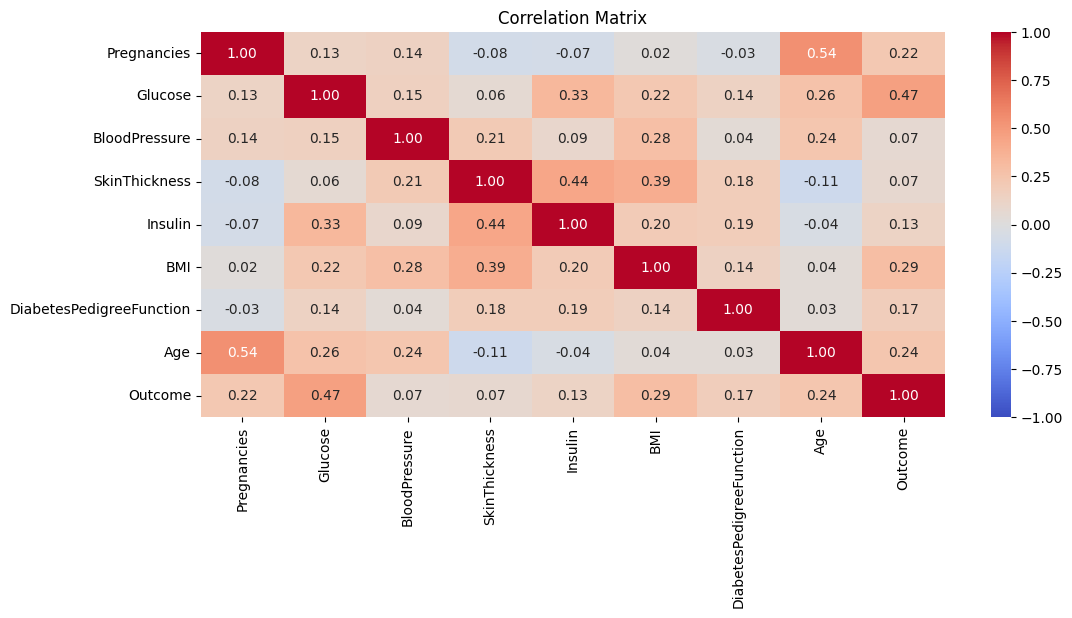

In [33]:
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Correlation with the target variable 'Outcome'

In [34]:
print("Correlation with Outcome:")
print(correlation_matrix['Outcome'].sort_values(ascending=False))

Correlation with Outcome:
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


# Mutual Information

Separate features and target

In [35]:
X = diabetes_df.drop(columns=['Outcome'])
y = diabetes_df['Outcome']

Compute mutual information

In [36]:
mutual_information = mutual_info_classif(X, y)

Creating a DataFrame for better visualization

In [38]:
mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_information})
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

print("Mutual Information with Outcome:")
print(mutual_info_df)

Mutual Information with Outcome:
                    Feature  Mutual Information
1                   Glucose            0.110589
5                       BMI            0.083710
4                   Insulin            0.057001
7                       Age            0.044131
0               Pregnancies            0.017787
3             SkinThickness            0.014992
6  DiabetesPedigreeFunction            0.012312
2             BloodPressure            0.000000


# Recursive Feature Elimination (RFE)


Initialize the model

In [39]:
logistic_model = LogisticRegression(max_iter=1000)

Initialize RFE with the model

In [40]:
rfe = RFE(estimator=logistic_model, n_features_to_select=5)

Fit RFE

In [41]:
rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)

Get selected features

In [43]:
selected_features = X.columns[rfe.support_]

print("Selected Features by RFE:")
print(selected_features)

Selected Features by RFE:
Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')
